In [5]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=5000, noise=0.3)

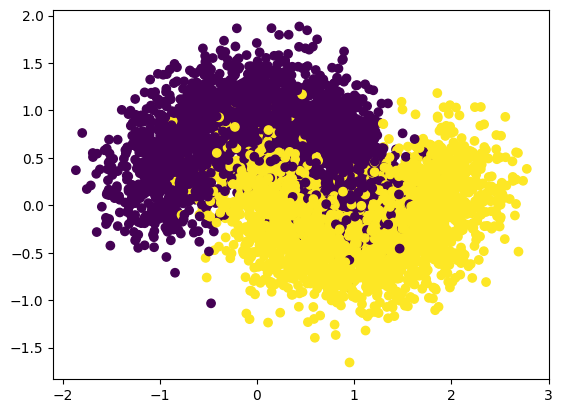

In [19]:
import matplotlib.pyplot as plt

X, y = moons[0], moons[1]
plt.scatter(X[:, 0], X[:, 1], c=y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_clf = SVC(kernel="rbf", probability=True)
svm_clf.fit(X_train, y_train)

rnd_clf =  RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
rnd_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
print(svm_clf.score(X_test, y_test))
print(rnd_clf.score(X_test,y_test))
print(knn_clf.score(X_test,y_test))

0.919
0.903
0.911


In [15]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf", knn_clf),
], voting="hard")

In [16]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm_clf', SVC(probability=True)),
                             ('rnd_clf', RandomForestClassifier(n_jobs=-1)),
                             ('knn_clf', KNeighborsClassifier())])

In [18]:
voting_clf.score(X_test, y_test)

0.942